# 1. Reading Libraries

In [87]:
import pandas as pd
import os
import glob
import glob
import os
import random
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Dense
from keras import models
from sklearn.ensemble import IsolationForest
from keras import optimizers
import itertools
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
train_path = "/scratch/rk9cx/conn_log_labelled_runtime/random_samples_W1-W2/train/"
test_path = "/scratch/rk9cx/conn_log_labelled_runtime/random_samples_W1-W2/test/"

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 2. Preprocessing

In [13]:
#input train & test file list
train_list = []
for file in glob.glob(os.path.join(train_path, '*.csv')):
            train_list.append(file.split("/train/")[1])
test_list = []
for file in glob.glob(os.path.join(test_path, '*.csv')):
            test_list.append(file.split("/test/")[1])

In [ ]:
train = pd.DataFrame()
for file in train_list:
    os.chdir(train_path)
    df = pd.read_csv(file)
    k = list(set(['A', 'D', 'F', 'H','I','Q', 'R', 'S', 'T', '^','-',
       'a', 'd', 'f', 'h', 'i', 'q', 'r', 's', 't', 'OTH', 'REJ', 'RSTO',
       'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH', 'SHR']) - set(df.columns))
    for i in k:
        df[i] = 0
    if "Unnamed: 0" in df:
        df.drop(df.columns[0],axis =1, inplace=True)
    

In [ ]:
test = pd.DataFrame()
for file in test_list:
    os.chdir(test_path)
    df = pd.read_csv(file)
    k = list(set(['A', 'D', 'F', 'H','I','Q', 'R', 'S', 'T', '^','-',
       'a', 'd', 'f', 'h', 'i', 'q', 'r', 's', 't', 'OTH', 'REJ', 'RSTO',
       'RSTOS0', 'RSTR', 'RSTRH', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH', 'SHR']) - set(df.columns))
    for i in k:
        df[i] = 0
    if "Unnamed: 0" in df:
        df.drop(df.columns[0],axis =1, inplace=True)
    test = test.append(df)

In [79]:
cols_to_drop = ["tsWeek","tsDay","tsElapsed"]

In [83]:
train.drop(cols_to_drop, axis = 1, inplace=True)
test.drop(cols_to_drop, axis = 1, inplace=True)

In [84]:
set(train.columns) - set(test.columns)

set()

In [85]:
X_train = train.loc[:, train.columns != 'label']
y_train = train.loc[:, train.columns == 'label']
X_test = test.loc[:, test.columns != 'label']
y_test = test.loc[:, test.columns == 'label']

# 3. Modelling

In [88]:
#function for plotting confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## 3.1 Random Forest

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion matrix, without normalization
[[1703706   84980]
 [ 173827 1614859]]


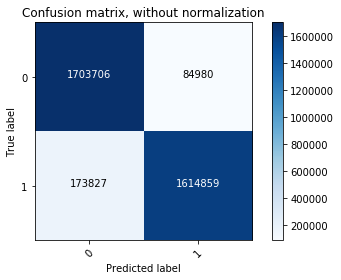

In [94]:
m = RandomForestClassifier(n_estimators=1000, min_samples_leaf=100, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train) 
pred_y = m.predict(X_test)
cm= confusion_matrix(y_test, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [95]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
print(precision, recall, fpr*100, accuracy*100, F1)

0.9500070300775544 0.9028186053896547 4.7509736197409715 92.76544345961226 0.9258119119111944


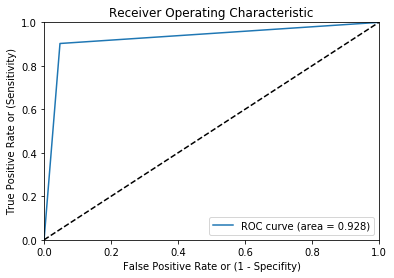

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# 3.2 Gradient Boosting Classifier

In [ ]:
g = GradientBoostingClassifier(n_estimators=500, min_samples_leaf=100, max_features=0.5, subsample = 0.9, random_state = 2, max_depth = 3)
g.fit(X_train, y_train) 
pred_y = g.predict(X_test)
cm= confusion_matrix(y_test, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


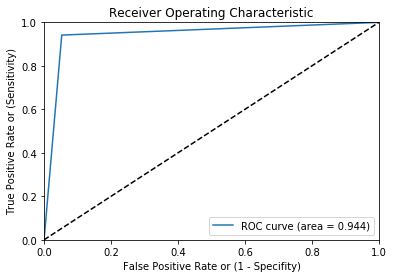

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [113]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
print(precision, recall, fpr*100, accuracy*100, F1)

0.9468979077978095 0.941484978358415 5.27985347903433 94.43432217840359 0.9441836851691282


## 3.3 Artificial Neural Network

In [115]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
       
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall(y_true, y_pred):
   
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
    

def precision(y_true, y_pred):
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [124]:
model = models.Sequential()
model.add(Dense(25, input_dim=53, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
sgd=optimizers.SGD(lr=0.001, momentum=0.5, decay=0.00002, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [126]:
result = model.fit(X_train, y_train, epochs=30, batch_size=256, verbose=1, validation_split=0.3) 

Train on 2370368 samples, validate on 1015872 samples
Epoch 1/30
2370368/2370368 [==============================] - 32s 14us/step - loss: 7.5679 - acc: 6.8344e-05 - val_loss: 8.9116 - val_acc: 0.0000e+00
Epoch 2/30
2370368/2370368 [==============================] - 33s 14us/step - loss: 7.5825 - acc: 0.0069 - val_loss: 8.9116 - val_acc: 0.0000e+00
Epoch 3/30
2370368/2370368 [==============================] - 33s 14us/step - loss: 7.5694 - acc: 7.4630e-04 - val_loss: 8.9116 - val_acc: 0.0000e+00
Epoch 4/30
2370368/2370368 [==============================] - 33s 14us/step - loss: 7.5693 - acc: 7.5220e-04 - val_loss: 8.9116 - val_acc: 0.0000e+00
Epoch 5/30
2370368/2370368 [==============================] - 32s 14us/step - loss: 7.5697 - acc: 7.3280e-04 - val_loss: 8.9116 - val_acc: 0.0000e+00
Epoch 6/30
2370368/2370368 [==============================] - 33s 14us/step - loss: 7.5691 - acc: 6.3408e-04 - val_loss: 8.9116 - val_acc: 0.0000e+00
Epoch 7/30
2370368/2370368 [======================

In [127]:
preds = model.predict_classes(X_test)

Confusion matrix, without normalization
[[      0       0]
 [1798911 1778461]]


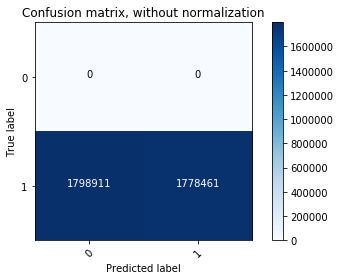

In [128]:
cm= confusion_matrix(preds, pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [129]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
F1 = 2 * (precision * recall) / (precision + recall)
print(precision, recall, fpr*100, accuracy*100, F1)

1.0 0.4971417565743792 nan 49.71417565743792 0.664121155383299


/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


In [ ]:
import random
outliers_fraction = [0.5,0.4,0.3,0.20,.25,0.2,0.15,0.1,0.05,0.01,0.001]
n_estimators=[100,200,300]
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in range(10):
    a = random.choice(n_estimators)
    b = random.choice(max_features)
    c = random.choice(outliers_fraction)
    I = IsolationForest(n_estimators=a, max_features=b, contamination=c, n_jobs=-1)
    I.fit(X_train)
    X_train["Iscores"+ str(i)] = I.predict(X_train)
    X_train["Iscores"+ str(i)] = [1 if x == -1 else 0 for x in X_train["Iscores"+ str(i)]]
    I.fit(X_test)
    X_test["Iscores"+ str(i)] = I.predict(X_test)
    X_test["Iscores"+ str(i)] = [1 if x == -1 else 0 for x in X_test["Iscores"+ str(i)]]

/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/rk9cx/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 

In [ ]:
X_train_sep = X_train.T.tail(10).T
X_test_sep = X_test.T.tail(10).T

In [ ]:
RF = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features=0.6).fit(X_train_sep, y_train)
pred_y=RF.predict(X_test_sep)
cm= confusion_matrix(y_test,pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [ ]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
print(precision, recall, fpr*100, accuracy*100)